In [1]:
#This is a work in progress file .I add to it slowly after every few day
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data
data=pd.read_csv('F:/IMP.DATA/Documents/FlippNation/r/Data (1)/Data/bank-full.csv',sep=';')
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
#Converting the format of Output Variable from Strings to Numeric
# 
data.y.replace(('yes','no'),(1,0),inplace=True)
data.default.replace(('yes','no'),(1,0),inplace=True)
data.housing.replace(('yes','no'),(1,0),inplace=True)
data.loan.replace(('yes','no'),(1,0),inplace=True)

data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [3]:
#Statistical Properties of the numerical variables
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
#Value Counts of items in the age variable 
data.age.value_counts()


32    2085
31    1996
33    1972
34    1930
35    1894
36    1806
30    1757
37    1696
39    1487
38    1466
40    1355
41    1291
42    1242
45    1216
29    1185
46    1175
43    1161
44    1136
47    1088
28    1038
48     997
49     994
50     939
51     936
52     911
27     909
53     891
57     828
54     811
55     806
      ... 
67      54
71      54
72      52
20      50
77      44
73      44
69      44
75      39
74      37
68      36
19      35
76      32
80      31
78      30
79      25
83      22
82      19
81      17
18      12
84       9
86       9
85       5
87       4
89       3
88       2
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

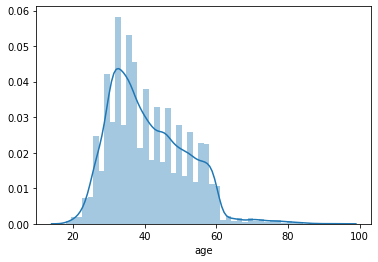

In [7]:
sns.distplot(data.age)

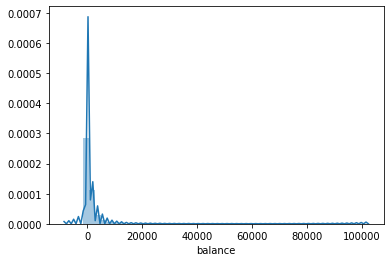

In [26]:
sns.distplot(data.balance)

In [5]:
#Value Counts of items in the job variable 
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

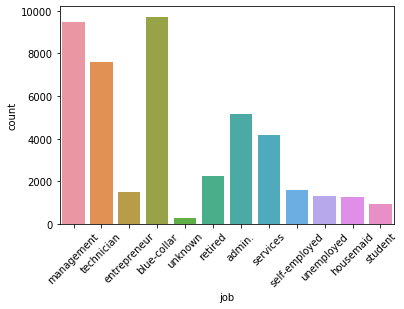

In [37]:
chart=sns.countplot(data.job)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

In [38]:
data.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

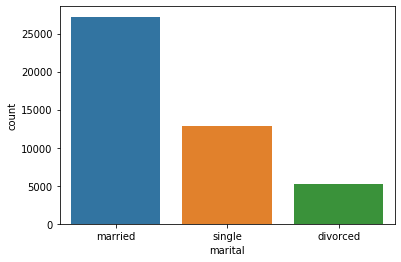

In [45]:
sns.countplot(data.marital)

In [7]:
data.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

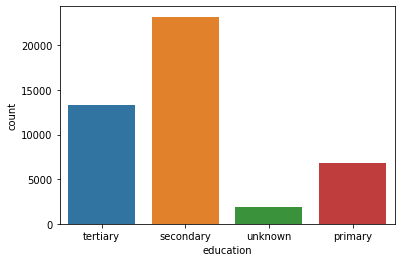

In [46]:
sns.countplot(data.education)

In [18]:
data.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [19]:
data.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

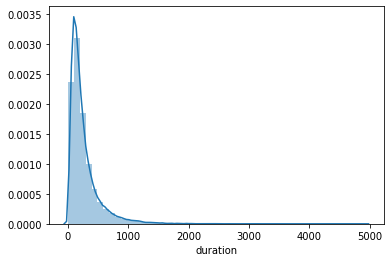

In [12]:
sns.distplot(data.duration)

In [20]:
data.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

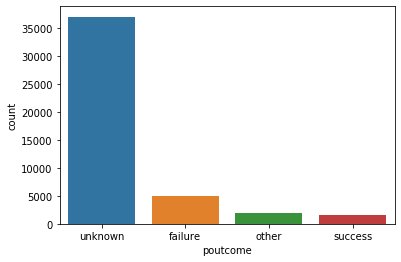

In [13]:
sns.countplot(data.poutcome)

In [29]:
#Categorizing the age variable
bins=[18,20,25,30,35,42,50,60,70,80,90,100] 
labels=['18 to 20','20 to 25','25 to 30','30 to 35','35 to 42','42 to 50','50 to 60','60 to 70','70 to 80','80 to 90','90 to 100']
data['age group']=pd.cut(data.age,bins=bins,labels=labels,include_lowest=True,right=False)
data['age group'].value_counts()

35 to 42     10995
30 to 35      9740
42 to 50      9009
50 to 60      8410
25 to 30      4464
60 to 70      1230
20 to 25       762
70 to 80       424
80 to 90       121
18 to 20        47
90 to 100        9
Name: age group, dtype: int64

In [30]:
pd.crosstab(data['age group'],data.y)

y,no,yes
age group,,
18 to 20,29,18
20 to 25,573,189
25 to 30,3743,721
30 to 35,8688,1052
35 to 42,9898,1097
42 to 50,8182,827
50 to 60,7625,785
60 to 70,865,365
70 to 80,244,180


In [31]:
pd.crosstab(data['job'],data.y)

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269
